In [1]:
%load_ext autoreload
%autoreload 2

from pray import PRay
from jax  import numpy as np

from matplotlib import pyplot as plt

In [2]:
axes = np.linspace(-16,16,num=33)
a, b = np.meshgrid(axes, axes)

In [3]:
pray = PRay(0.9375, eps=1e-2, atol=1e-3, rtol=1e-3)
pray.set_cam(1e4, 90, 0)
pray.set_pixels(a, b)
print(pray.s0.shape)

/Users/ckc/Library/Python/3.9/lib/python/site-packages/jax/experimental/maps.py:517: UserWarning: xmap is an experimental feature and probably has bugs!
  warn("xmap is an experimental feature and probably has bugs!")


Radius of outer event horizon: 1.3479853
(2, 4, 33, 33)


In [4]:
pray.geode(names={'ind':'lambda'})

0it [00:00, ?it/s]

jit(masked_do); input: Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[2,4,33,33])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float32[2,4,33,33])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,33,33])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,33,33])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,33,33])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,33,33])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,33,33])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,33,33])>with<DynamicJaxprTrace(level=0/1)>]


1801it [00:33, 53.38it/s, lambda=-2.37e+04, dlambda=-1.44e+04]


In [5]:
l = np.linspace(-10100,-9900,2001)
i = pray._geode(l) # interpolate

f = pray._geode.states # full steps
print(f.shape)

ix = i[:,0,1]
iy = i[:,0,2]
iz = i[:,0,3]

fx = f[:,0,1]
fy = f[:,0,2]
fz = f[:,0,3]

(1802, 2, 4, 33, 33)


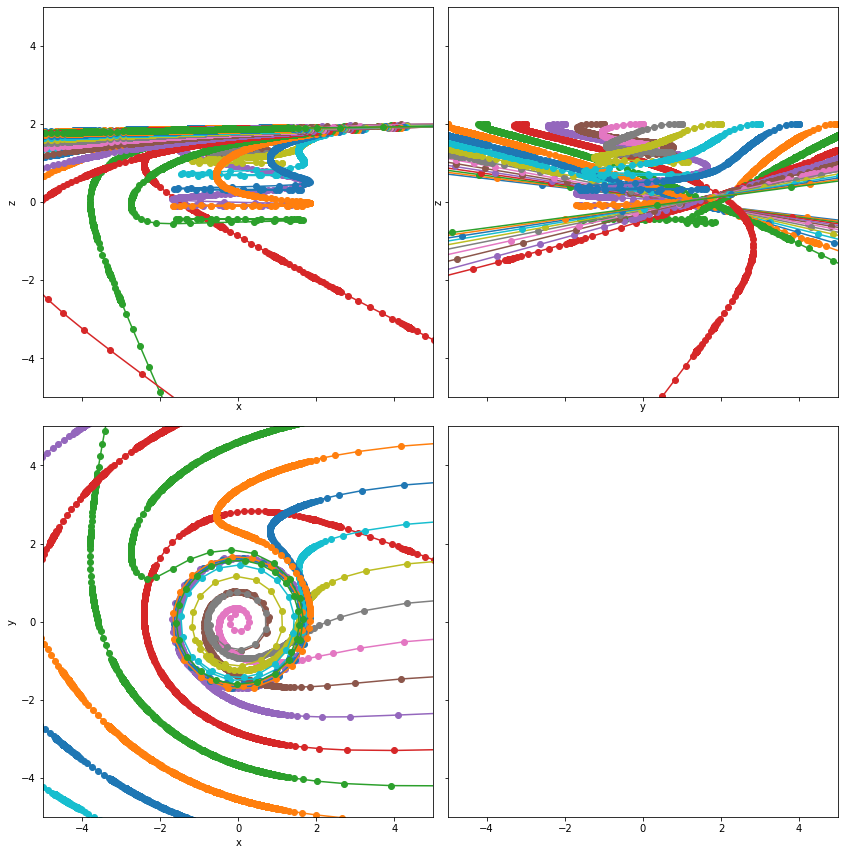

In [6]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

i=18
for j in range(33):
    axes[0][0].plot(fx[:,i,j], fz[:,i,j], '-o', color=f'C{j}')
    axes[0][1].plot(fy[:,i,j], fz[:,i,j], '-o', color=f'C{j}')
    axes[1][0].plot(fx[:,i,j], fy[:,i,j], '-o', color=f'C{j}')

fig.tight_layout()

ax = axes[0][0]
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')

ax = axes[0][1]
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')

ax = axes[1][0]
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')

ax = axes[1][1]
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')